### Stochastic Vectorization

Trading rules (Rayner Teo)

    1. Stock is above its 200-day moving average 
    
    2. Entry when 10-period stochastic (%K) is below 5

    3. Place a 3% buy limit order valid for 10 days
     
    4. Exit on a higher close or after 10 trading days 

In [1]:
import yfinance as yf
import pandas as pd 
import ta 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#set indicators function 
def indicators(df):
    df['SMA_200'] = ta.trend.sma_indicator(df.Close, window=200)
    df['stoch'] = ta.momentum.stoch(df.High, df.Low, df.Close, window=10)
    df.dropna(inplace=True)

In [3]:
df = yf.download('AAPL',start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
indicators(df)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch
Date,,,,,,,,
2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270226,112559200,88.593500,64.464685
2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600388,115393800,88.813162,51.522047
2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,89.021275,28.386633
2020-10-20,116.199997,118.980003,115.629997,117.510002,116.108406,124423700,89.234075,30.017800
2020-10-21,116.669998,118.709999,116.449997,116.870003,115.476036,89946000,89.445437,21.111164
...,...,...,...,...,...,...,...,...
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.899567,82507500,159.229400,97.086817
2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100,159.325700,91.580202
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600,159.408651,88.773664


In [7]:
#set buying conditions 
df['Buy'] = (df.Close > df.SMA_200) & (df.stoch < 5)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch,Buy
Date,,,,,,,,,
2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270226,112559200,88.593500,64.464685,False
2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600388,115393800,88.813162,51.522047,False
2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,89.021275,28.386633,False
2020-10-20,116.199997,118.980003,115.629997,117.510002,116.108406,124423700,89.234075,30.017800,False
2020-10-21,116.669998,118.709999,116.449997,116.870003,115.476036,89946000,89.445437,21.111164,False
...,...,...,...,...,...,...,...,...,...
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.899567,82507500,159.229400,97.086817,False
2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100,159.325700,91.580202,False
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600,159.408651,88.773664,False


In [9]:
#if buy parameter is true, take 97% of the closing price as the buying price, else fill with nan
df['buyprice'] = np.where(df.Buy, df.Close * 0.97, np.nan)

In [10]:
#forward fill the buyprice column 
df.buyprice = df.buyprice.ffill()

In [11]:
#set sell price col by shifting Open price retroactively 
df['sellprice'] = df.Open.shift(-1)

In [12]:
#set multiple columns to account for shifted low and close prices over multiple periods (10 days)
for i in range(1,11):
    df['shifted_Low_'+str(i)] = df.Low.shift(-i)
    df['shifted_Close_'+str(i)] = df.Close.shift(-i)

colnames_low = ['shifted_Low_'+str(i) for i in range(1,11)]
colnames_close = ['shifted_Close_'+str(i) for i in range(1,11)]

In [13]:
colnames_low

['shifted_Low_1',
 'shifted_Low_2',
 'shifted_Low_3',
 'shifted_Low_4',
 'shifted_Low_5',
 'shifted_Low_6',
 'shifted_Low_7',
 'shifted_Low_8',
 'shifted_Low_9',
 'shifted_Low_10']

In [14]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch,Buy,buyprice,...,shifted_Low_6,shifted_Close_6,shifted_Low_7,shifted_Close_7,shifted_Low_8,shifted_Close_8,shifted_Low_9,shifted_Close_9,shifted_Low_10,shifted_Close_10
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270226,112559200,88.593500,64.464685,False,NaN,...,114.279999,115.040001,112.879997,115.050003,114.540001,116.599998,111.099998,111.199997,112.199997,115.320000
2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600388,115393800,88.813162,51.522047,False,NaN,...,112.879997,115.050003,114.540001,116.599998,111.099998,111.199997,112.199997,115.320000,107.720001,108.860001
2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,89.021275,28.386633,False,NaN,...,114.540001,116.599998,111.099998,111.199997,112.199997,115.320000,107.720001,108.860001,107.320000,108.769997
2020-10-20,116.199997,118.980003,115.629997,117.510002,116.108406,124423700,89.234075,30.017800,False,NaN,...,111.099998,111.199997,112.199997,115.320000,107.720001,108.860001,107.320000,108.769997,108.730003,110.440002
2020-10-21,116.669998,118.709999,116.449997,116.870003,115.476036,89946000,89.445437,21.111164,False,NaN,...,112.199997,115.320000,107.720001,108.860001,107.320000,108.769997,108.730003,110.440002,112.349998,114.949997
2020-10-22,117.449997,118.040001,114.589996,115.750000,114.369392,101988000,89.645200,10.740772,False,NaN,...,107.720001,108.860001,107.320000,108.769997,108.730003,110.440002,112.349998,114.949997,116.870003,119.029999
2020-10-23,116.389999,116.550003,114.279999,115.040001,113.667870,82572600,89.833362,6.840703,False,NaN,...,107.320000,108.769997,108.730003,110.440002,112.349998,114.949997,116.870003,119.029999,116.129997,118.690002
2020-10-26,114.010002,116.550003,112.879997,115.050003,113.677742,111850700,90.020700,17.346166,False,NaN,...,108.730003,110.440002,112.349998,114.949997,116.870003,119.029999,116.129997,118.690002,116.050003,116.320000
2020-10-27,115.489998,117.279999,114.540001,116.599998,115.209251,92276800,90.207500,36.650253,False,NaN,...,112.349998,114.949997,116.870003,119.029999,116.129997,118.690002,116.050003,116.320000,114.129997,115.970001


In [15]:
#raw buying signals 
raw_signals = df[df.Buy]

In [17]:
#check shifted low prices in raw signals where the price is lower or equal to the buyprice
raw_signals[colnames_low].le(raw_signals.buyprice,axis=0)

,shifted_Low_1,shifted_Low_2,shifted_Low_3,shifted_Low_4,shifted_Low_5,shifted_Low_6,shifted_Low_7,shifted_Low_8,shifted_Low_9,shifted_Low_10
Date,,,,,,,,,,
2020-10-28,False,True,True,False,False,False,False,False,False,False
2020-11-23,False,False,False,False,False,False,False,False,False,False
2021-01-06,False,False,False,False,False,False,False,False,False,False
2021-02-22,True,False,True,True,False,False,True,True,True,True
2021-03-08,False,False,False,False,False,False,False,False,False,False
2021-05-10,True,True,False,False,False,False,True,False,False,False
2021-09-17,True,False,False,False,False,False,False,False,True,True
2021-09-30,False,False,False,False,False,False,False,False,False,False
2022-01-06,False,False,False,False,False,False,False,True,True,True


In [38]:
checkbuys = raw_signals[colnames_low].le(raw_signals.buyprice,axis=0)

In [39]:
#checkbuys.astype(int)

#screen for instances where cumulative is 1 after booleans have been interpreted as int 
checkbuys_sum = checkbuys.cumsum(axis=1) == 1

In [42]:
filtered_buys = checkbuys[checkbuys_sum]

In [46]:
filtered_buys = filtered_buys.astype(float)

In [54]:
raw_trades = filtered_buys.T.idxmax()

In [55]:
raw_trades

Date
2020-10-28    shifted_Low_2
2020-11-23              NaN
2021-01-06              NaN
2021-02-22    shifted_Low_1
2021-03-08              NaN
2021-05-10    shifted_Low_1
2021-09-17    shifted_Low_1
2021-09-30              NaN
2022-01-06    shifted_Low_8
2022-01-19    shifted_Low_3
2022-01-20    shifted_Low_2
2022-01-21    shifted_Low_1
2022-02-23    shifted_Low_1
2022-03-11              NaN
2022-04-11    shifted_Low_9
2022-04-14    shifted_Low_6
2022-04-22    shifted_Low_2
dtype: object

In [57]:
#extract the last element of the shifted low trades
extract_buys_raw = raw_trades.str.split('_').str[-1]
extract_buys_raw

Date
2020-10-28      2
2020-11-23    NaN
2021-01-06    NaN
2021-02-22      1
2021-03-08    NaN
2021-05-10      1
2021-09-17      1
2021-09-30    NaN
2022-01-06      8
2022-01-19      3
2022-01-20      2
2022-01-21      1
2022-02-23      1
2022-03-11    NaN
2022-04-11      9
2022-04-14      6
2022-04-22      2
dtype: object

In [58]:
#fill nan values in extract_buys_raw with 10, note: 10 is utylized since the default waiting period for the process is 10 days
extract_buys = extract_buys_raw.fillna(10)

In [60]:
extract_buys.head()

Date
2020-10-28     2
2020-11-23    10
2021-01-06    10
2021-02-22     1
2021-03-08    10
dtype: object

In [61]:
#loop for the days and added buy order dates 
buydates = [df.loc[i:].index[int(e)] for i,e in zip(extract_buys.index, extract_buys.values)]

In [68]:
buydates[:5]

[Timestamp('2020-10-30 00:00:00'),
 Timestamp('2020-12-08 00:00:00'),
 Timestamp('2021-01-21 00:00:00'),
 Timestamp('2021-02-23 00:00:00'),
 Timestamp('2021-03-22 00:00:00')]

In [69]:
#create buy dataframe by indexing raw dataframe by buy dates 
buy_df = df.loc[buydates]

In [71]:
buy_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch,Buy,buyprice,...,shifted_Low_6,shifted_Close_6,shifted_Low_7,shifted_Close_7,shifted_Low_8,shifted_Close_8,shifted_Low_9,shifted_Close_9,shifted_Low_10,shifted_Close_10
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,111.059998,111.989998,107.720001,108.860001,107.561584,190272600,90.710325,8.976375,False,107.863997,...,116.050003,116.320000,114.129997,115.970001,116.440002,119.489998,118.570000,119.209999,117.870003,119.260002
2020-12-08,124.370003,124.980003,123.089996,124.379997,123.108490,82225500,95.776637,95.157338,False,110.434499,...,126.559998,127.809998,128.039993,128.699997,126.120003,126.660004,123.449997,128.229996,129.649994,131.880005
2021-01-21,133.800003,139.669998,133.589996,136.869995,135.470810,120150900,105.036412,78.142049,False,122.801999,...,130.210007,131.960007,130.929993,134.139999,134.610001,134.990005,133.610001,133.940002,134.589996,137.389999
2021-02-23,123.760002,126.709999,118.389999,125.860001,124.759521,158273000,112.107025,38.327343,False,122.220000,...,121.839996,122.059998,118.620003,120.129997,117.570000,121.419998,116.209999,116.360001,118.790001,121.089996
2021-03-22,120.330002,123.870003,120.260002,123.389999,122.311104,111912300,116.210650,54.567002,False,112.869201,...,118.860001,119.900002,121.150002,122.150002,122.489998,123.000000,123.070000,125.900002,125.650002,126.209999


In [72]:
df_test = pd.DataFrame(extract_buys_raw, columns=['NaN_check'])

In [74]:
df_test['buydates'] = buydates

In [75]:
df_test

,NaN_check,buydates
Date,,
2020-10-28,2,2020-10-30
2020-11-23,NaN,2020-12-08
2021-01-06,NaN,2021-01-21
2021-02-22,1,2021-02-23
2021-03-08,NaN,2021-03-22
2021-05-10,1,2021-05-11
2021-09-17,1,2021-09-20
2021-09-30,NaN,2021-10-14
2022-01-06,8,2022-01-19


In [76]:
#create selling df; derived from buy df which is checked by shifted close prices that are greater than buying price
checksells = buy_df[colnames_close].gt(buy_df.buyprice, axis=0)

In [77]:
checksells

,shifted_Close_1,shifted_Close_2,shifted_Close_3,shifted_Close_4,shifted_Close_5,shifted_Close_6,shifted_Close_7,shifted_Close_8,shifted_Close_9,shifted_Close_10
Date,,,,,,,,,,
2020-10-30,True,True,True,True,True,True,True,True,True,True
2020-12-08,True,True,True,True,True,True,True,True,True,True
2021-01-21,True,True,True,True,True,True,True,True,True,True
2021-02-23,True,False,False,True,True,False,False,False,False,False
2021-03-22,True,True,True,True,True,True,True,True,True,True
2021-05-11,False,True,True,True,True,True,True,True,True,True
2021-09-20,True,True,True,True,True,True,True,False,True,False
2021-10-14,True,True,True,True,True,True,True,True,True,True
2022-01-19,True,True,True,False,False,False,True,True,True,True


In [78]:
#change the values in shifted close 10 to be all true in order to exit the position after 10 days 
checksells[colnames_close[-1]] = True 

In [88]:
#check first instance of selling by checking the first close price that is true (through the instance when the cumulative sum is 1)
checksells_sum = checksells.cumsum(axis=1) == 1

In [89]:
filtered_sells = checksells[checksells_sum]

In [91]:
filtered_sells = filtered_sells.astype(float)

In [92]:
filtered_sells

,shifted_Close_1,shifted_Close_2,shifted_Close_3,shifted_Close_4,shifted_Close_5,shifted_Close_6,shifted_Close_7,shifted_Close_8,shifted_Close_9,shifted_Close_10
Date,,,,,,,,,,
2020-10-30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-23,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-11,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
raw_sells = filtered_sells.T.idxmax()

In [94]:
raw_sells

Date
2020-10-30    shifted_Close_1
2020-12-08    shifted_Close_1
2021-01-21    shifted_Close_1
2021-02-23    shifted_Close_1
2021-03-22    shifted_Close_1
2021-05-11    shifted_Close_2
2021-09-20    shifted_Close_1
2021-10-14    shifted_Close_1
2022-01-19    shifted_Close_1
2022-01-24    shifted_Close_1
2022-01-24    shifted_Close_1
2022-01-24    shifted_Close_1
2022-02-24    shifted_Close_1
2022-03-25    shifted_Close_1
2022-04-25    shifted_Close_3
2022-04-25    shifted_Close_3
2022-04-26    shifted_Close_2
dtype: object

In [95]:
extract_sells = raw_sells.str.split('_').str[-1].astype(int)

In [96]:
extract_sells

Date
2020-10-30    1
2020-12-08    1
2021-01-21    1
2021-02-23    1
2021-03-22    1
2021-05-11    2
2021-09-20    1
2021-10-14    1
2022-01-19    1
2022-01-24    1
2022-01-24    1
2022-01-24    1
2022-02-24    1
2022-03-25    1
2022-04-25    3
2022-04-25    3
2022-04-26    2
dtype: int32

In [97]:
selldates = [df.loc[i:].index[e] for i,e in zip(extract_sells.index, extract_sells.values)]

In [98]:
selldates[:5]

[Timestamp('2020-11-02 00:00:00'),
 Timestamp('2020-12-09 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-02-24 00:00:00'),
 Timestamp('2021-03-23 00:00:00')]

In [99]:
df_test['selldates'] = selldates

In [100]:
df_test

,NaN_check,buydates,selldates
Date,,,
2020-10-28,2,2020-10-30,2020-11-02
2020-11-23,NaN,2020-12-08,2020-12-09
2021-01-06,NaN,2021-01-21,2021-01-22
2021-02-22,1,2021-02-23,2021-02-24
2021-03-08,NaN,2021-03-22,2021-03-23
2021-05-10,1,2021-05-11,2021-05-13
2021-09-17,1,2021-09-20,2021-09-21
2021-09-30,NaN,2021-10-14,2021-10-15
2022-01-06,8,2022-01-19,2022-01-20


In [104]:
# for instances where the NaN check is nan, set the sell date to the buy date 
df_test.loc[df_test['NaN_check'].isna(), 'selldates'] = df_test.loc[df_test['NaN_check'].isna()].buydates

In [105]:
df_test

,NaN_check,buydates,selldates
Date,,,
2020-10-28,2,2020-10-30,2020-11-02
2020-11-23,NaN,2020-12-08,2020-12-08
2021-01-06,NaN,2021-01-21,2021-01-21
2021-02-22,1,2021-02-23,2021-02-24
2021-03-08,NaN,2021-03-22,2021-03-22
2021-05-10,1,2021-05-11,2021-05-13
2021-09-17,1,2021-09-20,2021-09-21
2021-09-30,NaN,2021-10-14,2021-10-14
2022-01-06,8,2022-01-19,2022-01-20


In [106]:
#A real trade is a trade initiated when the index is greater than the previous sell date
trades = df_test[df_test.index > df_test.selldates.shift(1)]
trades

,NaN_check,buydates,selldates
Date,,,
2020-11-23,NaN,2020-12-08,2020-12-08
2021-01-06,NaN,2021-01-21,2021-01-21
2021-02-22,1,2021-02-23,2021-02-24
2021-03-08,NaN,2021-03-22,2021-03-22
2021-05-10,1,2021-05-11,2021-05-13
2021-09-17,1,2021-09-20,2021-09-21
2021-09-30,NaN,2021-10-14,2021-10-14
2022-01-06,8,2022-01-19,2022-01-20
2022-02-23,1,2022-02-24,2022-02-25


In [107]:
real_trades = df_test[:1].append(trades)

In [108]:
real_trades_executed = real_trades.dropna()

In [109]:
real_trades_executed

,NaN_check,buydates,selldates
Date,,,
2020-10-28,2,2020-10-30,2020-11-02
2021-02-22,1,2021-02-23,2021-02-24
2021-05-10,1,2021-05-11,2021-05-13
2021-09-17,1,2021-09-20,2021-09-21
2022-01-06,8,2022-01-19,2022-01-20
2022-02-23,1,2022-02-24,2022-02-25
2022-04-11,9,2022-04-25,2022-04-28


In [110]:
buys = df.loc[real_trades_executed.buydates].buyprice
sells = df.loc[real_trades_executed.selldates].sellprice

In [111]:
buys

Date
2020-10-30    107.863997
2021-02-23    122.220000
2021-05-11    123.044499
2021-09-20    141.678198
2022-01-19    161.243096
2022-02-24    155.267907
2022-04-25    156.936293
Name: buyprice, dtype: float64

In [112]:
profit = (sells.values - buys.values) / buys.values
profit 

array([0.01665066, 0.02012764, 0.02605156, 0.01956405, 0.01970256,
       0.05018481, 0.03124646])

In [113]:
#cumulative profit 
(profit + 1).cumprod()

array([1.01665066, 1.03711344, 1.06413186, 1.08495059, 1.1063269 ,
       1.16184771, 1.19815133])

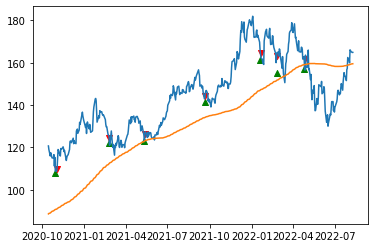

In [115]:
plt.plot(df.Close)
plt.plot(df.SMA_200)
plt.scatter(buys.index, buys.values, marker='^', c='g')
plt.scatter(sells.index, sells.values, marker='v', c='r')